In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [164]:
df=pd.read_csv('raw/faults/agitatorfault.csv',header=0)
df

,Time_min,ReactorTemp,Pressure_bar,Volume_m3,Agitator_Speed_rpm,Coolant_Flow_m3_s,Feed_Flow_m3_s,Coolant_delatT_K
0,0.0,315.251123,1.200000,8.916667,800,0.000000,0.000000,7.012356
1,0.5,316.107388,1.262317,8.994521,800,0.413430,0.002576,10.381835
2,1.0,317.408591,1.420772,9.070621,800,0.993892,0.002475,13.567458
3,1.5,320.459609,1.473591,9.149315,800,1.000000,0.002561,16.168271
4,2.0,323.583160,1.491197,9.225946,800,0.980534,0.002533,18.499236
...,...,...,...,...,...,...,...,...
596,298.0,332.694411,1.399023,27.646414,0,0.543448,0.000000,20.556682
597,298.5,333.923086,1.397116,27.647001,0,0.540000,0.000000,21.465258
598,299.0,333.878703,1.395414,27.647620,0,0.544351,0.000000,20.689342
599,299.5,332.907993,1.394499,27.648095,0,0.540000,0.000000,21.191848


<Axes: xlabel='Time_min'>

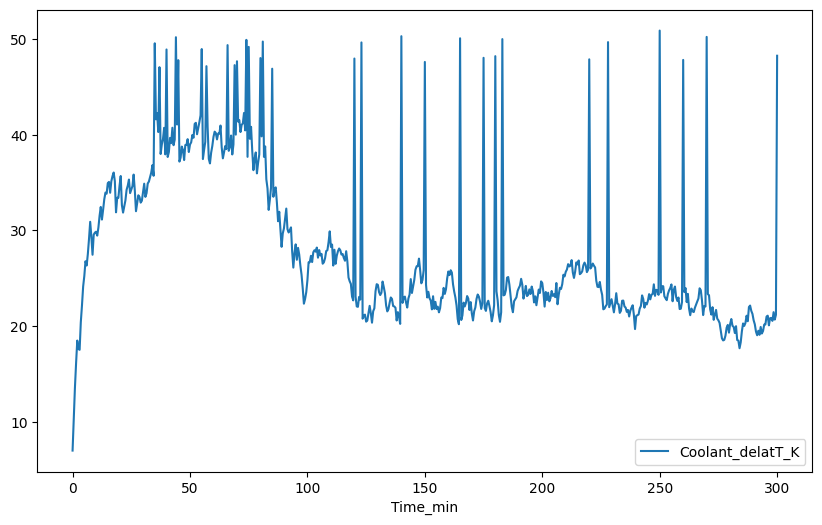

In [165]:
df.plot(x='Time_min', y=['Coolant_delatT_K'], figsize=(10, 6))


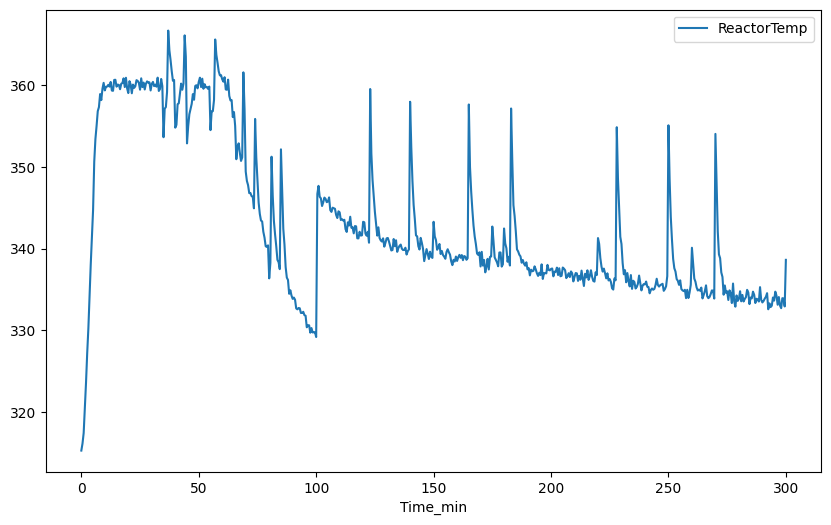

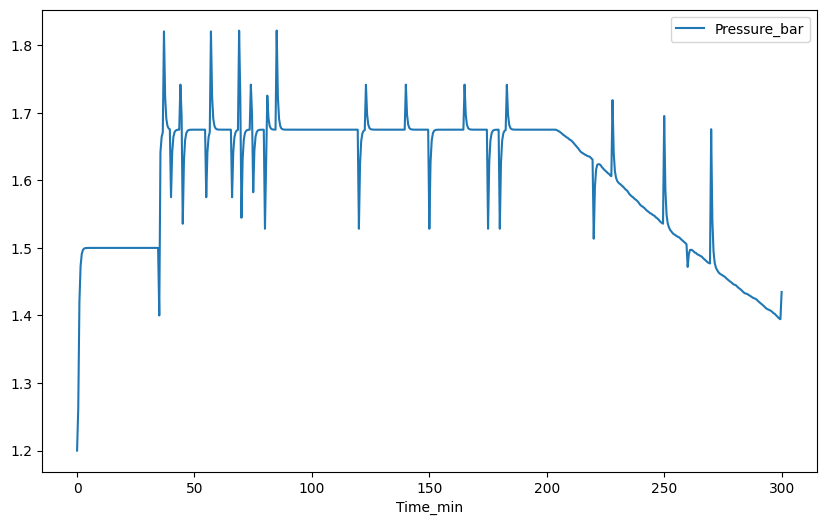

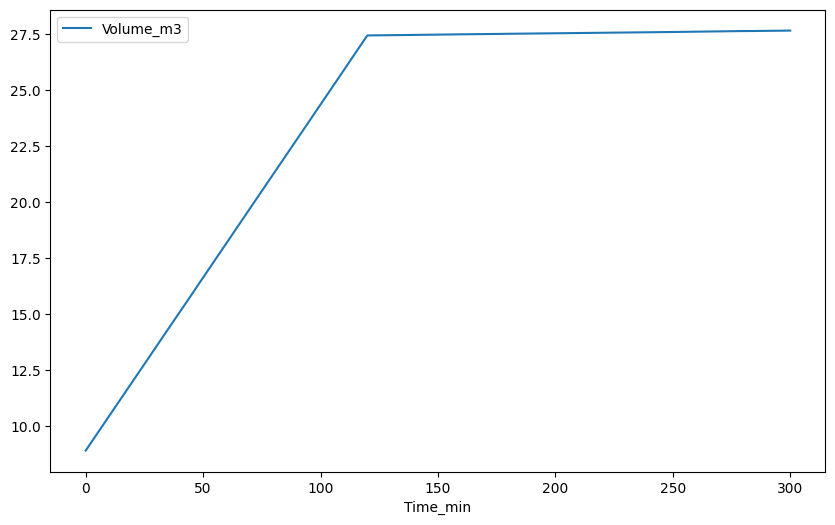

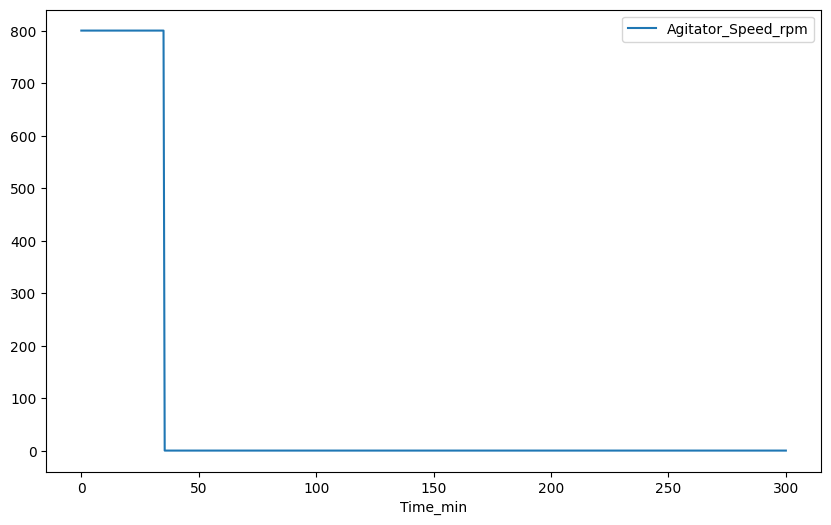

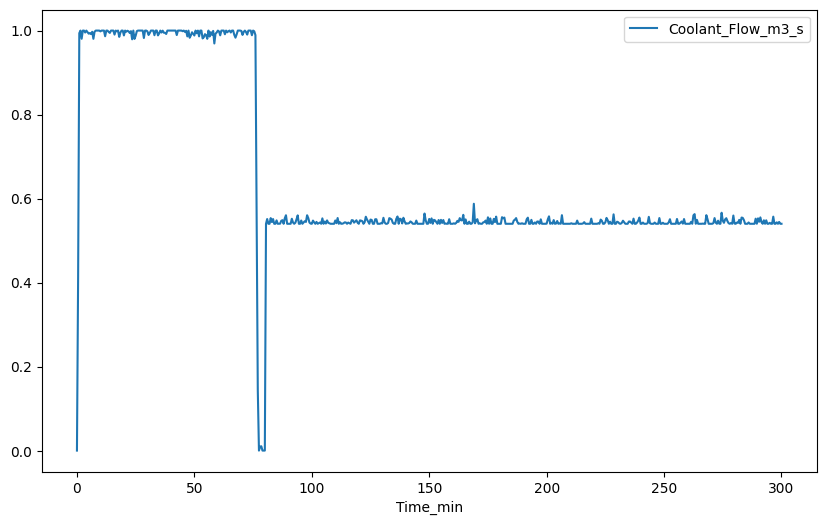

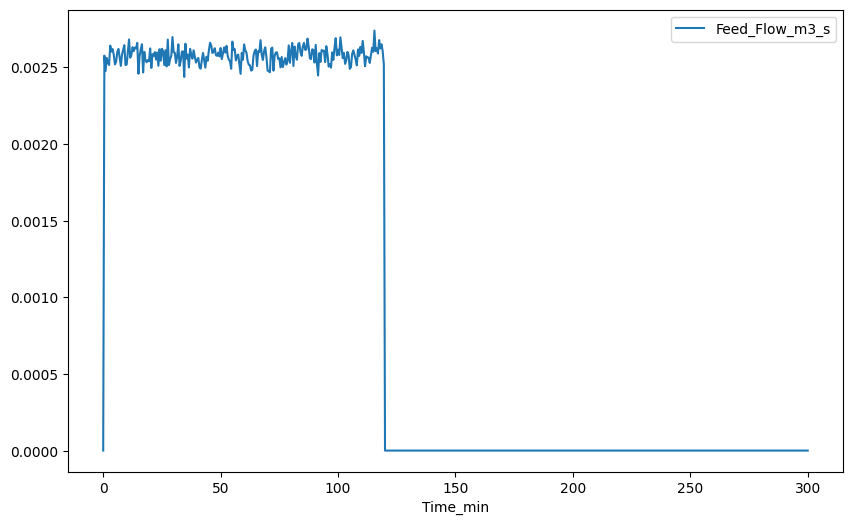

In [166]:
df.plot(x='Time_min', y=['ReactorTemp'], figsize=(10, 6))
df.plot(x='Time_min', y=['Pressure_bar'], figsize=(10, 6))
df.plot(x='Time_min', y=['Volume_m3'], figsize=(10, 6))
df.plot(x='Time_min', y=['Agitator_Speed_rpm'], figsize=(10, 6))
df.plot(x='Time_min', y=['Coolant_Flow_m3_s'], figsize=(10, 6))

df.plot(x='Time_min', y=['Feed_Flow_m3_s'], figsize=(10, 6))

plt.show()

In [150]:
def add_fluctuations(df, column='ReactorTemp', mean=2, std_dev=0.4):
    noise = np.random.normal(loc=mean, scale=std_dev, size=len(df))
    df[column] = df[column] + noise
    return df

In [151]:
df.loc[df['Time_min'] > 35, 'Agitator_Speed_rpm'] = 0
df.loc[df['Time_min'].isin([35, 40, 55, 66, 75]), 'ReactorTemp'] = 340
df.loc[df['Time_min'].isin([45, 70, 80, 120, 175,150,180,220,260,300]), 'ReactorTemp'] = 330
df.loc[df['Time_min'].isin([37, 44, 57, 69, 85]), 'ReactorTemp'] = 380
df.loc[df['Time_min'].isin([44, 74, 81, 123, 165,140,183,228,270,250]), 'ReactorTemp'] = 375
df['ReactorTemp'] = df['ReactorTemp'].ewm(span=5, adjust=False).mean()
df.loc[df['Time_min'] > 100, 'ReactorTemp'] = df.loc[df['Time_min'] > 100, 'ReactorTemp'] + 18
df = add_fluctuations(df, 'ReactorTemp', std_dev=0.5)

In [153]:
df.loc[df['Time_min'].isin([35, 40, 55, 66, 75]), 'Pressure_bar'] = 1.35
df.loc[df['Time_min'].isin([45, 70, 80, 120, 175,150,180,220,260,300]), 'Pressure_bar'] = 1.28
df.loc[df['Time_min'].isin([37, 44, 57, 69, 85]), 'Pressure_bar'] = 1.72
df.loc[df['Time_min'].isin([44, 74, 81, 123, 165,140,183,228,270,250]), 'Pressure_bar'] = 1.6
df['Pressure_bar'] = df['Pressure_bar'].ewm(span=2, adjust=False).mean()
df.loc[df['Time_min'] > 35, 'Pressure_bar'] = df.loc[df['Time_min'] > 35, 'Pressure_bar'] + 0.175

In [155]:
df.loc[df['Time_min'] > 80, 'Coolant_Flow_m3_s'] = df.loc[df['Time_min'] > 80, 'Coolant_Flow_m3_s'] + 0.54
df.loc[df['Time_min'] > 35, 'Coolant_delatT_K'] = df.loc[df['Time_min'] > 35, 'Coolant_delatT_K'] + 5
df.loc[df['Time_min'] > 100, 'Coolant_delatT_K'] = df.loc[df['Time_min'] > 100, 'Coolant_delatT_K'] + 3
df.loc[df['Time_min'].isin([35, 40, 55, 66, 75]), 'Coolant_delatT_K'] = 47
df.loc[df['Time_min'].isin([45, 70, 80, 120, 175,150,180,220,260,300]), 'Coolant_delatT_K'] = 46
df.loc[df['Time_min'].isin([37, 44, 57, 69, 85]), 'Coolant_delatT_K'] = 45
df.loc[df['Time_min'].isin([44, 74, 81, 123, 165,140,183,228,270,250]), 'Coolant_delatT_K'] = 48
df = add_fluctuations(df, 'Coolant_delatT_K', std_dev=0.3)

In [193]:
df.columns

Index(['Time_min', 'ReactorTemp', 'Pressure_bar', 'Volume_m3',
       'Agitator_Speed_rpm', 'Coolant_Flow_m3_s', 'Feed_Flow_m3_s',
       'Coolant_delatT_K'],
      dtype='object')

In [225]:
df['Coolant_delatT_K']= df['Coolant_delatT_K']+4.5
df['ReactorTemp']= df['ReactorTemp']+ 20
df['Pressure_bar']= df['Pressure_bar']+ .05
df['Agitator_Speed_rpm']= df['Agitator_Speed_rpm']- 10
df['Coolant_Flow_m3_s']= df['Coolant_Flow_m3_s']+.2

In [226]:
df.to_csv('raw/normal/normalbatch6.csv',index=False)

In [93]:
max_ramp_length = 60  # number of points over which to ramp
max_values = [370, 380, 390, 404, 410, 421, 432, 450]
min_values = [340, 350, 358, 360, 368, 374, 369, 381]
start_times = [46, 92, 112, 145, 198, 234, 255, 271]

for start_time, min_val, max_val in zip(start_times, min_values, max_values):
    ramp_values = np.linspace(min_val, max_val, max_ramp_length)
    start_idx = df.index[df['Time_min'] == start_time][0]
    end_idx = start_idx + max_ramp_length - 1
    
    # Ensure the range is within DataFrame length
    if end_idx >= len(df):
        end_idx = len(df) - 1
        ramp_values = ramp_values[:end_idx - start_idx + 1]
    
    df.loc[start_idx:end_idx, 'ReactorTemp'] = ramp_values


In [95]:
df.loc[(df['Time_min'] > 50) & (df['ReactorTemp'] < 350), 'ReactorTemp'] = 367
df['ReactorTemp'] = df['ReactorTemp'].ewm(span=3, adjust=False).mean()
df = add_fluctuations(df, 'ReactorTemp', std_dev=0.4)


In [96]:
max_ramp_length = 60  # number of points over which to ramp
max_values = [1.5, 1.65, 1.7, 1.77, 1.83, 1.98, 2.2, 2.4]
min_values = [1.4, 1.48, 1.53, 1.58, 1.64, 1.7, 1.8, 1.9]
start_times = [46, 92, 112, 145, 198, 234, 255, 271]

for start_time, min_val, max_val in zip(start_times, min_values, max_values):
    ramp_values = np.linspace(min_val, max_val, max_ramp_length)
    start_idx = df.index[df['Time_min'] == start_time][0]
    end_idx = start_idx + max_ramp_length - 1
    
    # Ensure the range is within DataFrame length
    if end_idx >= len(df):
        end_idx = len(df) - 1
        ramp_values = ramp_values[:end_idx - start_idx + 1]
    
    df.loc[start_idx:end_idx, 'Pressure_bar'] = ramp_values


In [102]:
df['Pressure_bar'] = df['Pressure_bar'].ewm(span=3, adjust=False).mean()
df = add_fluctuations(df, 'ReactorTemp', std_dev=0.4)


In [ ]:
df.loc[df['Time_min'] > 77, 'Coolant_Flow_m3_s'] = df.loc[df['Time_min'] > 77, 'Coolant_Flow_m3_s'] + 0.97

In [ ]:
max_ramp_length = 60  # number of points over which to ramp
min_values = [0.0022, 0.0018, 0.0012, 0.0004 ]
max_values = [0.0025, 0.002, 0.0015, 0.0008]
start_times = [46, 92, 112, 145]

for start_time, min_val, max_val in zip(start_times, min_values, max_values):
    ramp_values = np.linspace(min_val, max_val, max_ramp_length)
    start_idx = df.index[df['Time_min'] == start_time][0]
    end_idx = start_idx + max_ramp_length - 1
    # Ensure the range is within DataFrame length
    if end_idx >= len(df):
        end_idx = len(df) - 1
        ramp_values = ramp_values[:end_idx - start_idx + 1]
    
    df.loc[start_idx:end_idx, 'Feed_Flow_m3_s'] = ramp_values

df['Feed_Flow_m3_s'] = df['Feed_Flow_m3_s'].ewm(span=3, adjust=False).mean()



In [142]:
df.loc[df['Time_min'] > 85, 'Coolant_delatT_K'] = df.loc[df['Time_min'] > 85, 'Coolant_delatT_K'] + 15
df.loc[df['Time_min'] > 135, 'Coolant_delatT_K'] = df.loc[df['Time_min'] > 135, 'Coolant_delatT_K'] + 10
df.loc[df['Time_min'] > 160, 'Coolant_delatT_K'] = df.loc[df['Time_min'] > 160, 'Coolant_delatT_K'] + 10
df.loc[df['Time_min'] > 212, 'Coolant_delatT_K'] = df.loc[df['Time_min'] > 212, 'Coolant_delatT_K'] + 12
df.loc[df['Time_min'] > 253, 'Coolant_delatT_K'] = df.loc[df['Time_min'] > 253, 'Coolant_delatT_K'] + 6
df['Feed_Flow_m3_s'] = df['Feed_Flow_m3_s'].ewm(span=3, adjust=False).mean()
